Found 2274 images belonging to 5 classes.
Found 487 images belonging to 5 classes.


D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2822 - loss: 1.7176

D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.41478, saving model to best_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2831 - loss: 1.7149 - val_accuracy: 0.4148 - val_loss: 1.2812
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4231 - loss: 1.3672
Epoch 2: val_accuracy improved from 0.41478 to 0.49897, saving model to best_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.4233 - loss: 1.3666 - val_accuracy: 0.4990 - val_loss: 1.1985
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4862 - loss: 1.2527
Epoch 3: val_accuracy did not improve from 0.49897
72/72 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.4862 - loss: 1.2526 - val_accuracy: 0.4825 - val_loss: 1.2217
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4805 - loss: 1.2228
Epoch 4: val_accuracy improved from 0.49897 to 0.61191, saving model to best_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.4807 - loss: 1.2222 - val_accurac

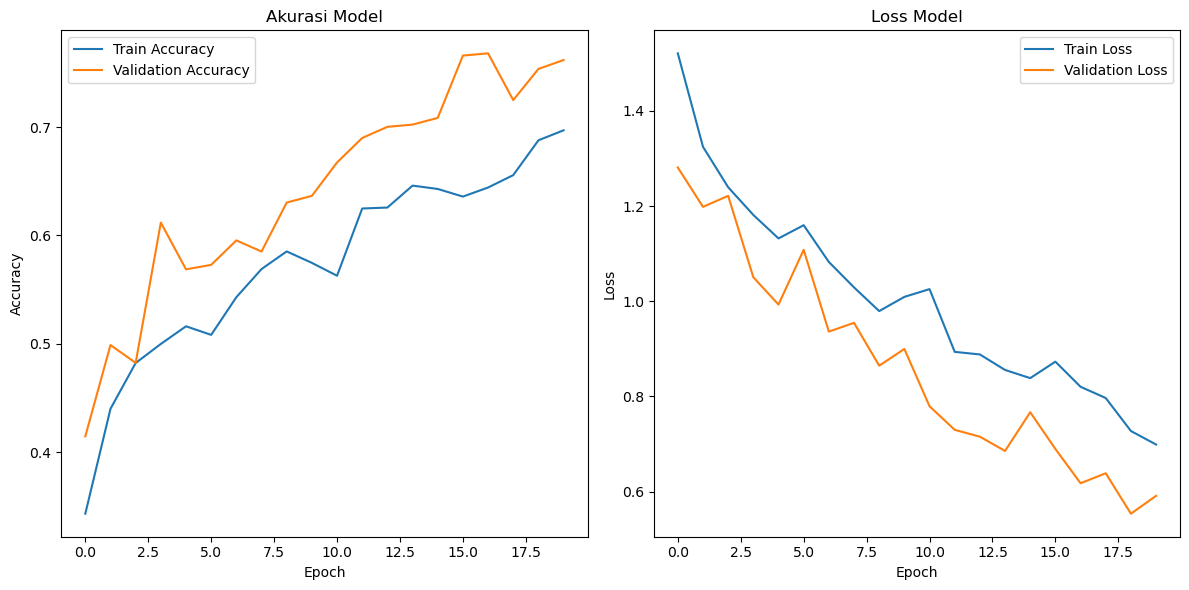

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Path ke dataset yang telah dibagi
train_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\DATASET\train"
val_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\DATASET\val"

# Parameter model
input_size = (224, 224)  # Ukuran gambar input
batch_size = 32          # Ukuran batch
num_classes = len(os.listdir(train_dir))  # Jumlah kelas berdasarkan folder di train_dir
epochs = 20              # Jumlah epoch

# Data Augmentation dan Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,    # Normalisasi gambar ke rentang [0, 1]
    rotation_range=20,    # Rotasi acak hingga 20 derajat
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0     # Normalisasi gambar ke rentang [0, 1]
)

# Generator dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Arsitektur Model CNN
model = Sequential([
    Input(shape=(224, 224, 3)),  # Menggunakan Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer sesuai jumlah kelas
])

# Compile Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Checkpoint untuk menyimpan model terbaik
checkpoint_path = "best_model.keras"  # Ubah ekstensi menjadi .keras
checkpoint = ModelCheckpoint(
    checkpoint_path, 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

# Training Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

# Menyimpan Model Final
final_model_path = "final_model.keras"  # Ubah ekstensi menjadi .keras
model.save(final_model_path)
print(f"Model final disimpan di: {final_model_path}")

# Plotting Akurasi dan Loss
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Fungsi untuk mengekstrak fitur dari gambar dan menyimpan ke Excel
def extract_features_and_save_to_excel(generator, model, output_file):
    features = []
    labels = []
    file_names = []

    for images, labels_batch in generator:
        feature_batch = model.predict(images)
        features.extend(feature_batch)
        labels.extend(labels_batch)
        file_names.extend(generator.filenames[generator.batch_index])

        if len(file_names) >= generator.samples:
            break

    # Konversi hasil ekstraksi fitur ke DataFrame
    df_features = pd.DataFrame(features)
    df_labels = pd.DataFrame(labels, columns=generator.class_indices.keys())
    df_file_names = pd.Series(file_names, name='File Name')

    # Gabungkan dalam satu DataFrame
    df_combined = pd.concat([df_file_names, df_labels], axis=1)
    df_combined.to_excel(output_file, index=False)
    print(f"Hasil fitur disimpan ke: {output_file}")

# Panggil fungsi untuk menyimpan hasil fitur
output_excel_file = 'feature_extraction_results.xlsx'
extract_features_and_save_to_excel(train_generator, model, output_excel_file)
